In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
df=pd.read_csv('tdtt.csv')
df.head()

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,er_referral
0,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,58,True,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,False
1,2020-04-07,"SARS-CoV-2, NAA",Oropharyngeal,Negative,35,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,False
2,2020-04-07,SARS CoV w/CoV 2 RNA,Oropharyngeal,Negative,12,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2020-04-07,SARS COV 2 RNA RTPCR,Nasopharyngeal,Negative,46,True,True,False,False,False,...,False,False,False,False,True,NaN,NaN,NaN,NaN,False
4,2020-04-07,SARS CoV w/CoV 2 RNA,Nasopharyngeal,Negative,-1,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,False


In [3]:
# Checking for null values
df.isnull().sum()

batch_date                         0
test_name                          0
swab_type                          0
covid19_test_results               0
age                                0
high_risk_exposure_occupation     14
high_risk_interactions           451
diabetes                           0
chd                                0
htn                                0
cancer                             0
asthma                             0
copd                               0
autoimmune_dis                     0
smoker                             0
temperature                       58
pulse                             51
sys                               50
dia                               50
rr                               189
sats                              61
rapid_flu_results                661
rapid_strep_results              714
ctab                              81
labored_respiration               60
rhonchi                          133
wheezes                          124
d

In [4]:
df.columns

Index(['batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'days_since_symptom_onset', 'cough', 'cough_severity',
       'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link', 'er_referral'],
      dtype='object')

In [5]:
# Dropping unnecessary columns
df.drop(['batch_date', 'test_name', 'swab_type','high_risk_exposure_occupation', 'high_risk_interactions','rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'days_since_symptom_onset','cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link', 'er_referral','smoker'],axis=1,inplace=True)

In [6]:
df.head()

,covid19_test_results,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,...,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,Negative,58,False,False,False,False,False,False,False,36.95,...,False,NaN,False,False,False,False,False,False,False,False
1,Negative,35,False,False,False,False,False,False,False,36.75,...,False,NaN,False,False,False,False,False,False,False,False
2,Negative,12,False,False,False,False,False,False,False,36.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Negative,46,False,False,False,False,False,False,False,36.75,...,True,Moderate,False,True,False,False,False,False,False,True
4,Negative,-1,False,False,False,False,False,False,False,36.25,...,False,NaN,False,False,False,False,False,False,False,False


In [7]:
# Null values imputation
df['temperature']=df['temperature'].fillna(df['temperature'].mean())
df['pulse']=df['pulse'].fillna(df['pulse'].mean())
df['sys']=df['sys'].fillna(df['sys'].mean())
df['dia']=df['dia'].fillna(df['dia'].mean())
df['rr']=df['rr'].fillna(df['rr'].mean())
df['sats']=df['sats'].fillna(df['sats'].mean())
df['cough_severity']=df['cough_severity'].fillna(df['cough_severity'].mode()[0])
df['fever']=df['fever'].fillna(df['fever'].mode()[0])
df['sob']=df['sob'].fillna(df['sob'].mode()[0])
df['sob_severity']=df['sob_severity'].fillna(df['sob_severity'].mode()[0])
df['diarrhea']=df['diarrhea'].fillna(df['diarrhea'].mode()[0])
df['fatigue']=df['fatigue'].fillna(df['fatigue'].mode()[0])
df['headache']=df['headache'].fillna(df['headache'].mode()[0])
df['loss_of_smell']=df['loss_of_smell'].fillna(df['loss_of_smell'].mode()[0])
df['loss_of_taste']=df['loss_of_taste'].fillna(df['loss_of_taste'].mode()[0])
df['runny_nose']=df['runny_nose'].fillna(df['runny_nose'].mode()[0])
df['muscle_sore']=df['muscle_sore'].fillna(df['muscle_sore'].mode()[0])
df['sore_throat']=df['sore_throat'].fillna(df['sore_throat'].mode()[0])



In [8]:
df.isnull().sum()

covid19_test_results    0
age                     0
diabetes                0
chd                     0
htn                     0
cancer                  0
asthma                  0
copd                    0
autoimmune_dis          0
temperature             0
pulse                   0
sys                     0
dia                     0
rr                      0
sats                    0
cough                   0
cough_severity          0
fever                   0
sob                     0
sob_severity            0
diarrhea                0
fatigue                 0
headache                0
loss_of_smell           0
loss_of_taste           0
runny_nose              0
muscle_sore             0
sore_throat             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   covid19_test_results  735 non-null    object 
 1   age                   735 non-null    int64  
 2   diabetes              735 non-null    bool   
 3   chd                   735 non-null    bool   
 4   htn                   735 non-null    bool   
 5   cancer                735 non-null    bool   
 6   asthma                735 non-null    bool   
 7   copd                  735 non-null    bool   
 8   autoimmune_dis        735 non-null    bool   
 9   temperature           735 non-null    float64
 10  pulse                 735 non-null    float64
 11  sys                   735 non-null    float64
 12  dia                   735 non-null    float64
 13  rr                    735 non-null    float64
 14  sats                  735 non-null    float64
 15  cough                 7

In [10]:
# Label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['covid19_test_results']=le.fit_transform(df['covid19_test_results'])
df['diabetes']=le.fit_transform(df['diabetes'])
df['chd']=le.fit_transform(df['chd'])
df['htn']=le.fit_transform(df['htn'])
df['cancer']=le.fit_transform(df['cancer'])
df['asthma']=le.fit_transform(df['asthma'])
df['copd']=le.fit_transform(df['copd'])
df['autoimmune_dis']=le.fit_transform(df['autoimmune_dis'])
df['fever']=le.fit_transform(df['fever'])
df['cough_severity']=le.fit_transform(df['cough_severity'])
df['cough']=le.fit_transform(df['cough'])
df['sob']=le.fit_transform(df['sob'])
df['sob_severity']=le.fit_transform(df['sob_severity'])
df['fatigue']=le.fit_transform(df['fatigue'])
df['headache']=le.fit_transform(df['headache'])
df['diarrhea']=le.fit_transform(df['diarrhea'])
df['loss_of_smell']=le.fit_transform(df['loss_of_smell'])
df['loss_of_taste']=le.fit_transform(df['loss_of_taste'])
df['runny_nose']=le.fit_transform(df['runny_nose'])
df['muscle_sore']=le.fit_transform(df['muscle_sore'])
df['sore_throat']=le.fit_transform(df['sore_throat'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   covid19_test_results  735 non-null    int32  
 1   age                   735 non-null    int64  
 2   diabetes              735 non-null    int64  
 3   chd                   735 non-null    int64  
 4   htn                   735 non-null    int64  
 5   cancer                735 non-null    int64  
 6   asthma                735 non-null    int64  
 7   copd                  735 non-null    int64  
 8   autoimmune_dis        735 non-null    int64  
 9   temperature           735 non-null    float64
 10  pulse                 735 non-null    float64
 11  sys                   735 non-null    float64
 12  dia                   735 non-null    float64
 13  rr                    735 non-null    float64
 14  sats                  735 non-null    float64
 15  cough                 7

In [12]:
df.head()

,covid19_test_results,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,...,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,0,58,0,0,0,0,0,0,0,36.95,...,0,1,0,0,0,0,0,0,0,0
1,0,35,0,0,0,0,0,0,0,36.75,...,0,1,0,0,0,0,0,0,0,0
2,0,12,0,0,0,0,0,0,0,36.95,...,0,1,0,0,0,0,0,0,0,0
3,0,46,0,0,0,0,0,0,0,36.75,...,1,1,0,1,0,0,0,0,0,1
4,0,-1,0,0,0,0,0,0,0,36.25,...,0,1,0,0,0,0,0,0,0,0


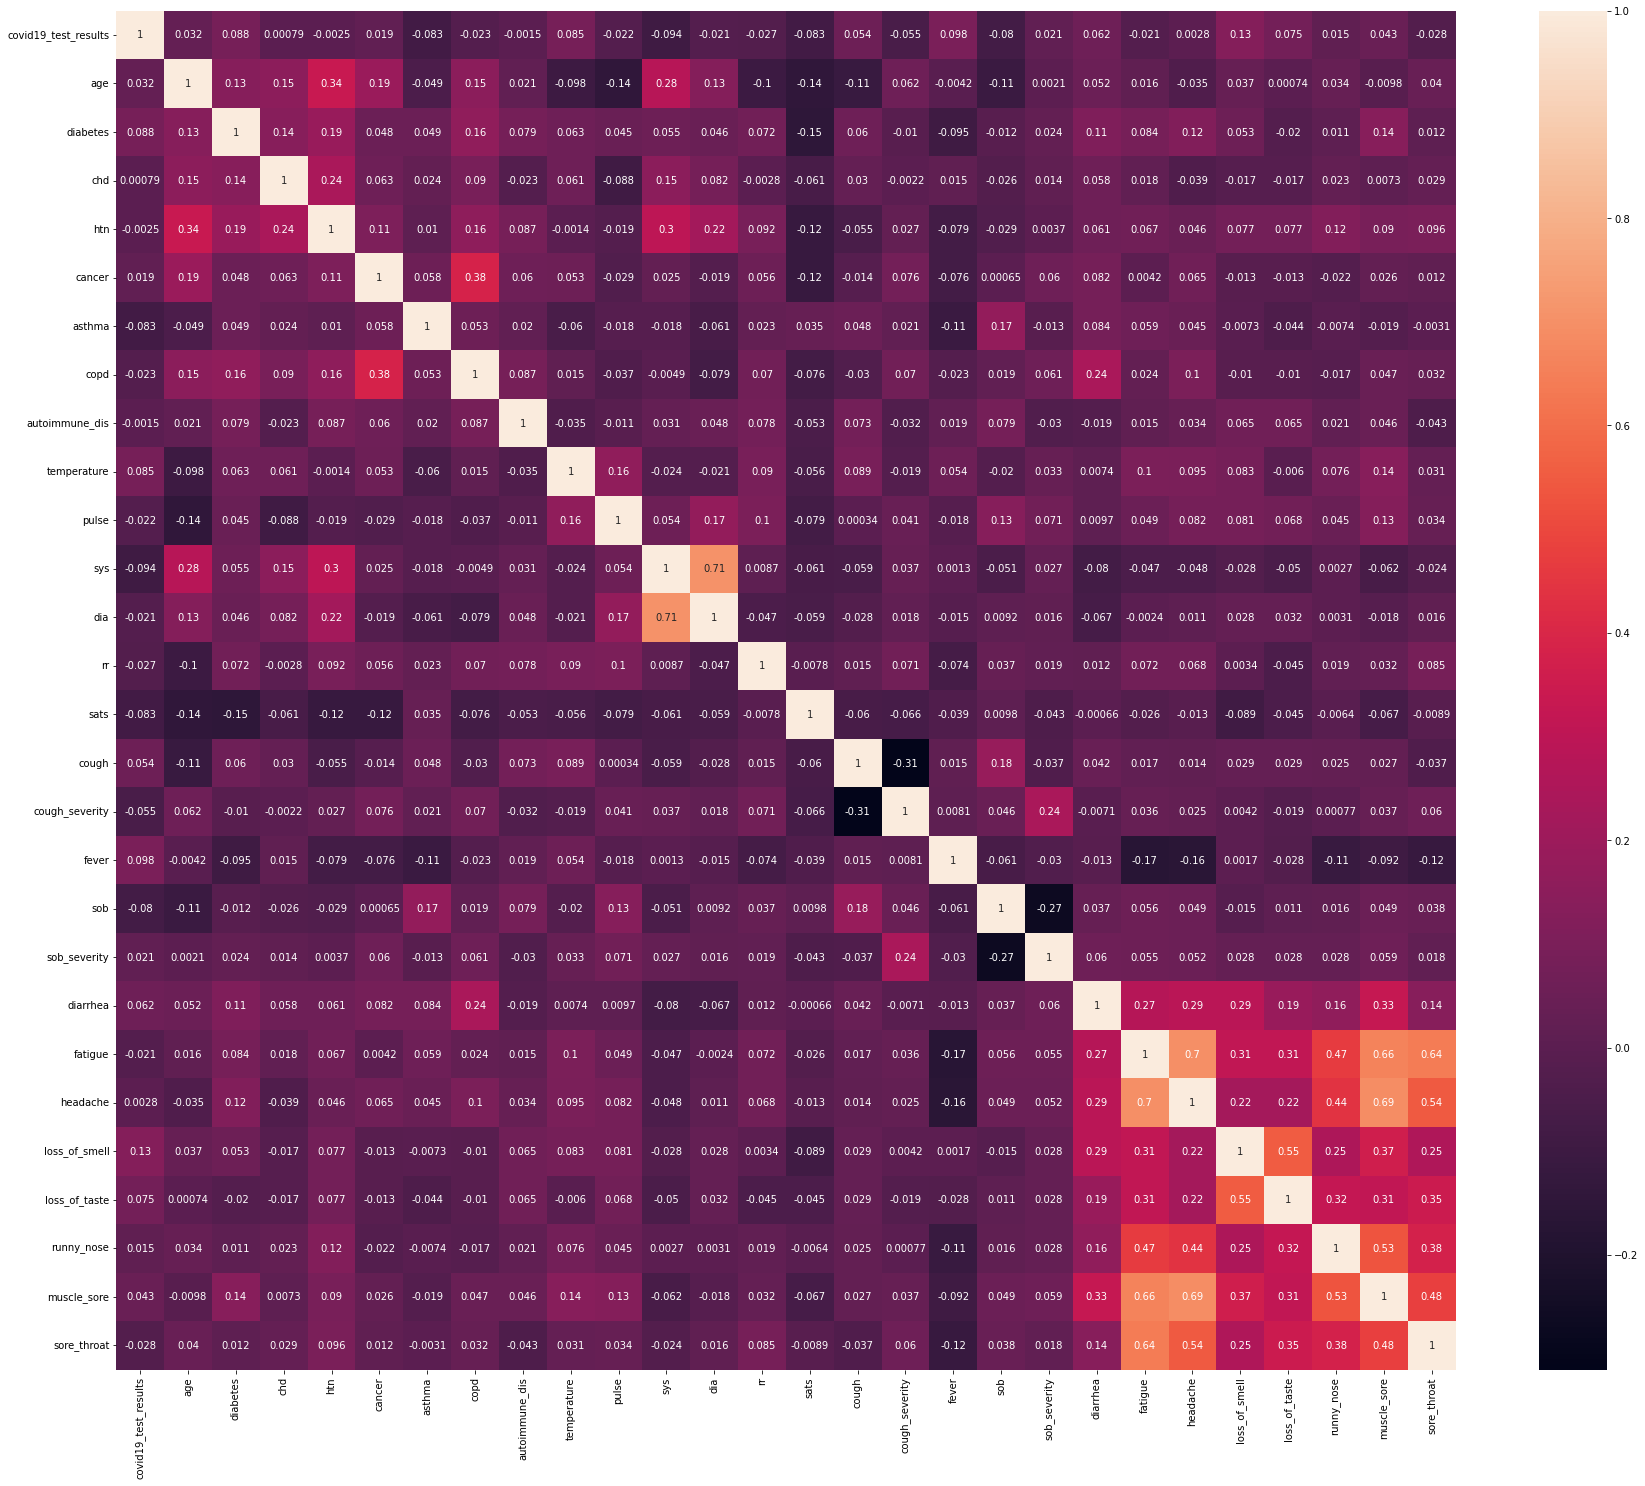

In [13]:
#Plotting correlation map
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
df.corr()

,covid19_test_results,age,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,temperature,...,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
covid19_test_results,1.000000,0.032198,0.088358,0.000794,-0.002548,0.018995,-0.083473,-0.023168,-0.001541,0.085332,...,-0.079762,0.021197,0.062002,-0.020661,0.002840,0.126372,0.074770,0.014696,0.042891,-0.028410
age,0.032198,1.000000,0.134286,0.152259,0.339266,0.191593,-0.048986,0.149625,0.021225,-0.097503,...,-0.106902,0.002101,0.051685,0.015935,-0.034687,0.037315,0.000736,0.034251,-0.009788,0.040059
diabetes,0.088358,0.134286,1.000000,0.137941,0.187860,0.048293,0.048542,0.161533,0.079208,0.062865,...,-0.012077,0.024052,0.109869,0.084469,0.117265,0.053043,-0.019558,0.011087,0.139284,0.011741
chd,0.000794,0.152259,0.137941,1.000000,0.239459,0.062961,0.023770,0.090082,-0.022954,0.061386,...,-0.025845,0.013962,0.058401,0.018369,-0.038990,-0.016609,-0.016609,0.023443,0.007276,0.029463
htn,-0.002548,0.339266,0.187860,0.239459,1.000000,0.105468,0.010064,0.157510,0.086973,-0.001385,...,-0.029463,0.003727,0.061384,0.066670,0.045945,0.076656,0.076656,0.121328,0.089943,0.095532
cancer,0.018995,0.191593,0.048293,0.062961,0.105468,1.000000,0.057582,0.380907,0.060061,0.052920,...,0.000653,0.059505,0.082252,0.004192,0.065311,-0.013076,-0.013076,-0.022038,0.025618,0.011942
asthma,-0.083473,-0.048986,0.048542,0.023770,0.010064,0.057582,1.000000,0.053376,0.019526,-0.059704,...,0.172309,-0.012887,0.083509,0.058799,0.044715,-0.007279,-0.043671,-0.007360,-0.019281,-0.003068
copd,-0.023168,0.149625,0.161533,0.090082,0.157510,0.380907,0.053376,1.000000,0.086632,0.015223,...,0.019044,0.061339,0.237882,0.024394,0.099893,-0.010101,-0.010101,-0.017024,0.047104,0.032406
autoimmune_dis,-0.001541,0.021225,0.079208,-0.022954,0.086973,0.060061,0.019526,0.086632,1.000000,-0.035298,...,0.078544,-0.030177,-0.018967,0.014990,0.033775,0.065170,0.065170,0.021061,0.045828,-0.043330
temperature,0.085332,-0.097503,0.062865,0.061386,-0.001385,0.052920,-0.059704,0.015223,-0.035298,1.000000,...,-0.020165,0.032733,0.007362,0.101226,0.095159,0.083081,-0.006024,0.075745,0.138815,0.031236


In [15]:
# Dropping unnecessary columns
df.drop(['htn','asthma','copd','autoimmune_dis','cough_severity','sob','sob_severity','fatigue'],axis=1,inplace=True)

In [16]:
df.columns

Index(['covid19_test_results', 'age', 'diabetes', 'chd', 'cancer',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'cough', 'fever',
       'diarrhea', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose',
       'muscle_sore', 'sore_throat'],
      dtype='object')

In [17]:
df.head()

,covid19_test_results,age,diabetes,chd,cancer,temperature,pulse,sys,dia,rr,sats,cough,fever,diarrhea,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,0,58,0,0,0,36.95,81.000000,126.000000,82.000000,18.0,97.000000,1,1,0,0,0,0,0,0,0
1,0,35,0,0,0,36.75,77.000000,131.000000,86.000000,16.0,98.000000,1,0,0,0,0,0,0,0,0
2,0,12,0,0,0,36.95,74.000000,122.000000,73.000000,17.0,98.000000,0,1,0,0,0,0,0,0,0
3,0,46,0,0,0,36.75,66.000000,128.000000,76.000000,18.0,100.000000,1,0,0,0,0,0,0,0,1
4,0,-1,0,0,0,36.25,83.346491,127.178102,80.843796,12.0,98.007418,1,1,0,0,0,0,0,0,0


In [18]:
# Separating dependant and independant variables
X=df.drop('covid19_test_results',axis=1)
y=df.covid19_test_results

In [19]:
X.columns

Index(['age', 'diabetes', 'chd', 'cancer', 'temperature', 'pulse', 'sys',
       'dia', 'rr', 'sats', 'cough', 'fever', 'diarrhea', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat'],
      dtype='object')

In [20]:
# performing train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.fit_transform(X_test)

In [22]:
# Fitting logistic regression algorithm
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_hat=clf.predict(X_test)

c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_hat)

0.9523809523809523

In [24]:
inputfeatures=[58,0,0,0,36.95,81.0,126.0,82.0,18.0,97.0,1,1,0,0,0,0,0,0,0]

In [25]:
infprob=clf.predict_proba([inputfeatures])[0][1]

In [26]:
infprob

0.12117596010732602

In [27]:
clf.predict_proba([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])[0][1]

0.9251529450681741